## Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

## Reading and exploring the data

In [2]:
df = pd.read_excel('real_estate_withheaders.xls')

In [3]:
df.shape

(21597, 21)

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
df = df.drop(columns = ["id","date"])

In [7]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      

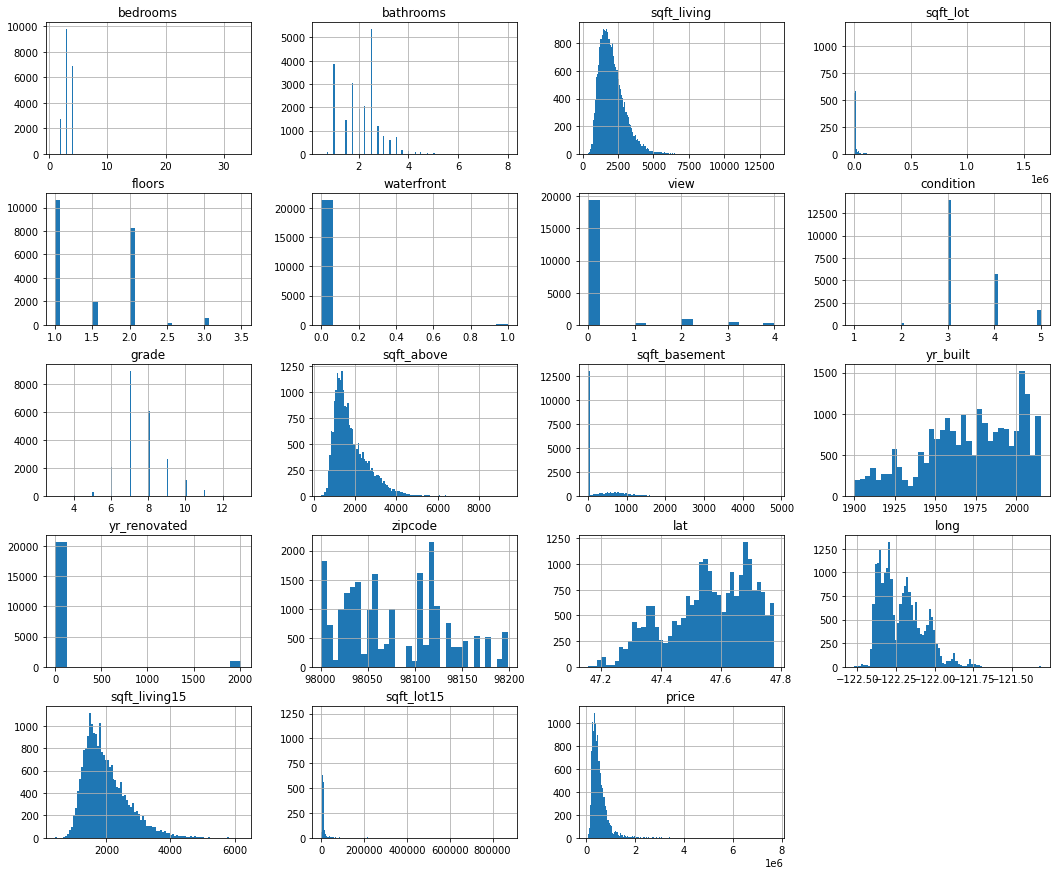

In [8]:
df.hist(bins = "auto", figsize=(18,15))

## Create a baseline model

 - Define X and y


In [9]:
X=df.drop(columns=['price'])
y=df['price']

- Split train and test sets

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=17)

- Train the model

In [11]:
ln=LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

- Evaluate the model

In [12]:
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7019429000040323
test r2: 0.6908176496433106


## Iteration 1 -  Scaling the data

In [13]:
# Define X and y
X=df.drop(columns=['price'])
y=df['price']


# Scale with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7019429000040323
test r2: 0.6908176496433291


In [14]:
# Define X and y
X=df.drop(columns=['price'])
y=df['price']


# Scale with MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7019429000040323
test r2: 0.6908176496433285


array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

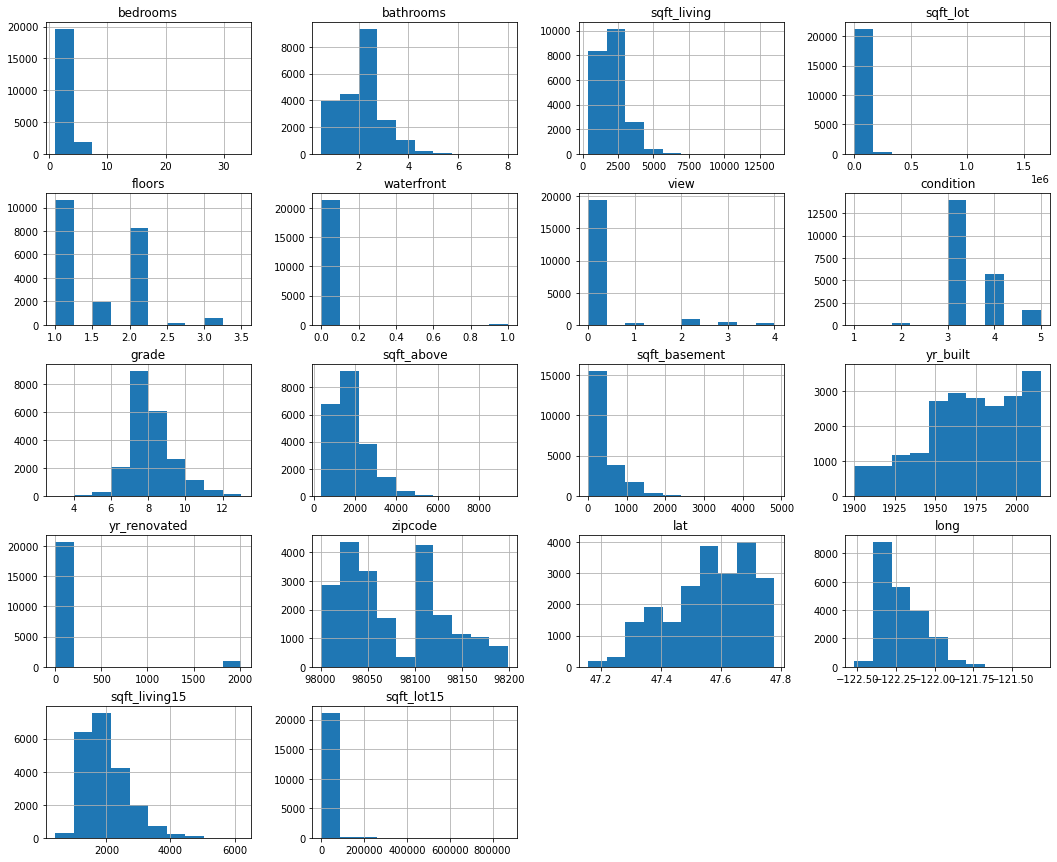

In [15]:
X.hist(figsize=(18,15))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

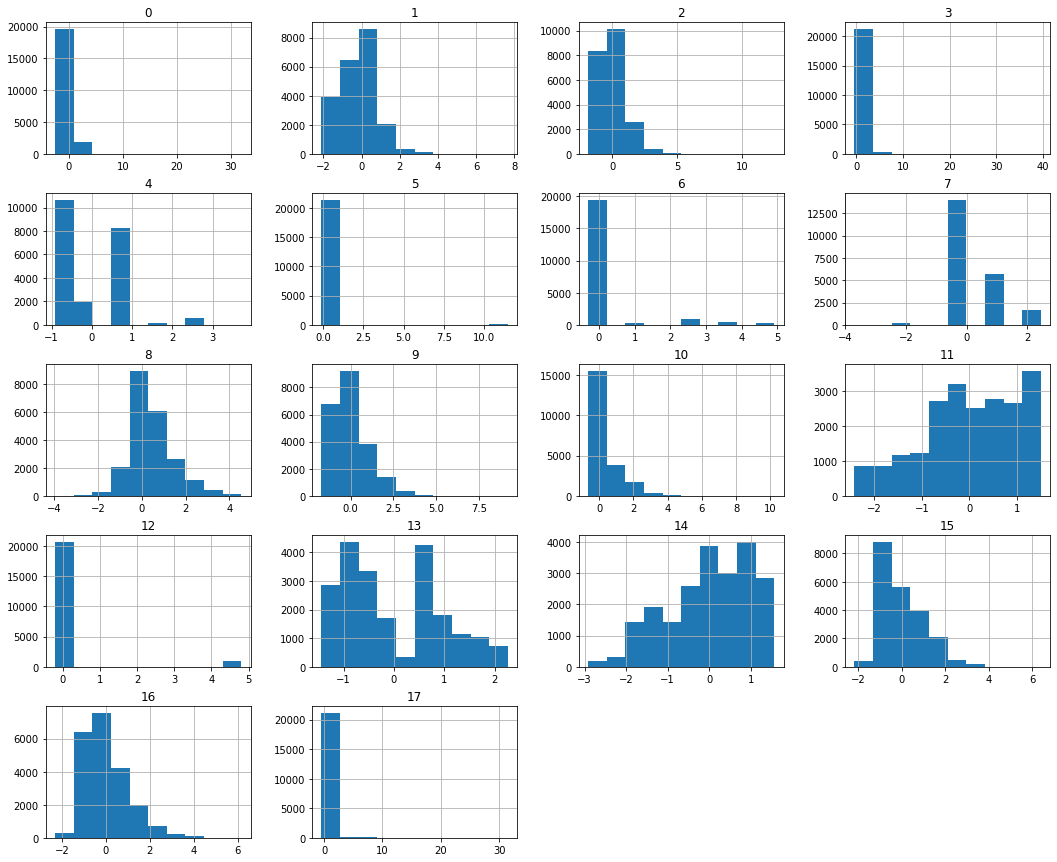

In [16]:
pd.DataFrame(X_scaled).hist(figsize=(18,15))

In [17]:
# Define X and y
X=df.drop(columns=['price'])
y=df['price']


# Scale with MinMaxScaler
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.701942900004032
test r2: 0.6908176496433293


## Iteration 2 -  Removing Outliers

<AxesSubplot:>

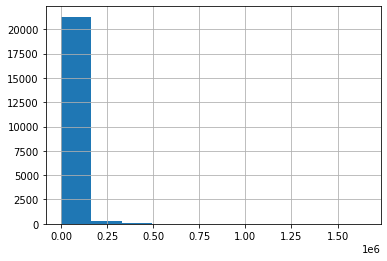

In [18]:
df["sqft_lot"].hist()

In [19]:
q1=np.percentile(df["sqft_lot"], 25)   # percentile 25
q3=np.percentile(df["sqft_lot"], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+5*iqr   # upper boundary
lower=q1-5*iqr   # lower boundary

In [20]:
len(df[df["sqft_lot"] < lower])

0

In [21]:
len(df[df["sqft_lot"] > upper])


1246

In [22]:
len(df[df["sqft_lot"] > upper])/len(df)*100


5.769319812936982

In [23]:
df_1 = df[df["sqft_lot"] > upper]

<AxesSubplot:>

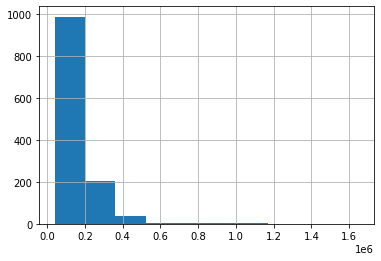

In [24]:
df_1["sqft_lot"].hist()

In [25]:
# Define X and y
X=df_1.drop(columns=['price'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7058350096574268
test r2: 0.7192007207711806


## Iteration 3 - Droping columns

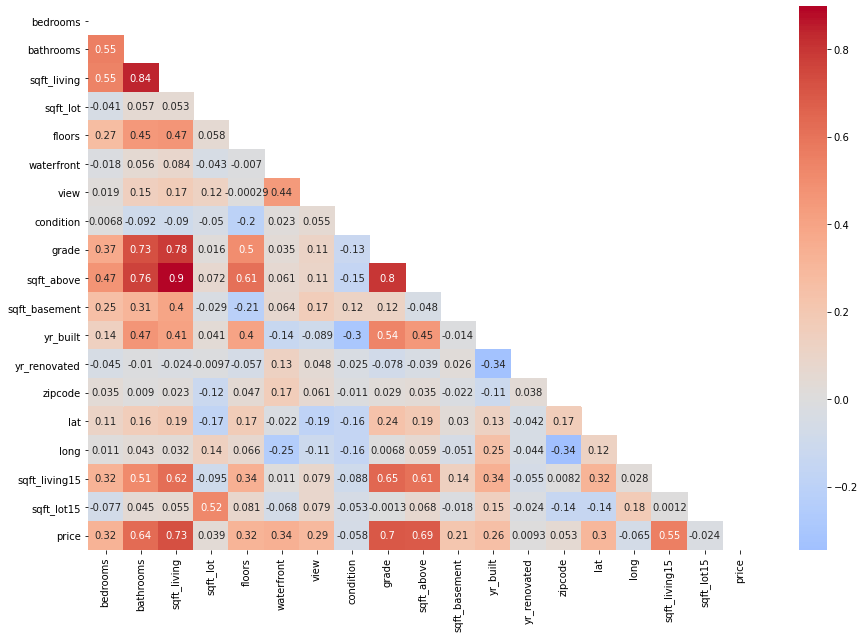

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(df_1.corr())

mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_1.corr(), mask=mask, annot=True, cmap='coolwarm', center=0)

plt.show()

In [27]:
# Define X and y
X=df_1.drop(columns=['price','sqft_above'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7058350096574257
test r2: 0.7192007207712854


In [28]:
# Define X and y
X=df_1.drop(columns=['price', 'waterfront'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.6631632104451276
test r2: 0.6698831915561745


In [29]:
# Define X and y
X=df_1.drop(columns=['price', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7058009178025109
test r2: 0.7200953282058772


In [30]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7058009178025111
test r2: 0.7200953282056657


## Iteration 4 - Creating new columns

In [31]:
df['bath_sqft'] = df['bathrooms']/df['sqft_living']
df['bath_bed'] = df['bathrooms']/df['bedrooms']
# df['price_sqft'] = df['price']/df['sqft_living'] in a real case we will not have "price" to compute this new feature

In [32]:
# Define X and y
X=df.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.7063818569344584
test r2: 0.7158861447251518


In [33]:
df_1['bath_sqft'] = df_1['bathrooms']/df_1['sqft_living']
df_1['bath_bed'] = df_1['bathrooms']/df_1['bedrooms']
# df_1['price_sqft'] = df_1['price']/df_1['sqft_living'] in a real case we will not have "price" to compute this new feature

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
ln=LinearRegression()
ln.fit(X_train,y_train)

# Evaluate the model
y_train_pred =ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.711302233361585
test r2: 0.7301330533042503


## Iteration 5 - Choose a model

In [35]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

# Evaluate the model
y_train_pred =KNN.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =KNN.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.40414229380217914
test r2: 0.2413152279989541


In [36]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

for i in range(1,20):
    # Train the model
    KNN=KNeighborsRegressor(n_neighbors = i)
    KNN.fit(X_train,y_train)

    # Evaluate the model
    y_train_pred =KNN.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    y_test_pred =KNN.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print("k = " + str(i))
    print("train r2: " + str(r2_train))
    print("test r2: " + str(r2_test))
    print("\n")

k = 1
train r2: 0.999847193075478
test r2: -0.24832652405375333


k = 2
train r2: 0.6894634020069315
test r2: 0.019874020312681262


k = 3
train r2: 0.5045607740184261
test r2: 0.10620673752187304


k = 4
train r2: 0.4423355317952222
test r2: 0.24531280711063763


k = 5
train r2: 0.40414229380217914
test r2: 0.2413152279989541


k = 6
train r2: 0.36469196510053214
test r2: 0.1861294512403754


k = 7
train r2: 0.3202326457355734
test r2: 0.15701508536589326


k = 8
train r2: 0.2906336300865511
test r2: 0.1368391963390655


k = 9
train r2: 0.2674450406736736
test r2: 0.12912933161548856


k = 10
train r2: 0.2408678768466881
test r2: 0.12122828018145204


k = 11
train r2: 0.21810283472450132
test r2: 0.11129934403806074


k = 12
train r2: 0.2122566121967968
test r2: 0.1045027589722487


k = 13
train r2: 0.21794978416010247
test r2: 0.0918275221701721


k = 14
train r2: 0.2021243950282381
test r2: 0.07932254765594893


k = 15
train r2: 0.18929606894829842
test r2: 0.08216168271546787


k =

In [37]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

# Evaluate the model
y_train_pred =tree.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =tree.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.999923596537739
test r2: 0.6895876827245679


In [38]:
# Define X and y
X=df_1.drop(columns=['price', 'sqft_above', 'yr_renovated'])
y=df_1['price']


# Split train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train the model
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

# Evaluate the model
y_train_pred =RF.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred =RF.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("train r2: " + str(r2_train))
print("test r2: " + str(r2_test))

train r2: 0.966971487762069
test r2: 0.7395381052854434
